# Binary Tree

What is a Binary Tree?

A Binary Tree is a hierarchical tree data structure in which each node has at most two children, which are referred to as the left child and the right child. This constraint of having at most two children per node is the defining characteristic of a binary tree.

Key Concepts of Binary Trees:

* Node: Each element in a tree is called a node. A node can contain data and references (pointers) to its left and right children.
* Root: The topmost node in the tree. There is only one root per tree.
* Parent Node: A node that has children.
* Child Node: A node that is directly below another node (its parent).
* Left Child: The node to the left of a parent node.
* Right Child: The node to the right of a parent node.
* Leaf Node: A node that has no children.
* Subtree: A part of the tree that is itself a valid tree, rooted at one of the children of a node.
* Depth of a Node: The number of edges from the root to the node. The root is at depth 0.
* Height of a Node: The number of edges from the node to the deepest leaf in its subtree. A leaf node has a height of 0.
* Height of a Tree: The height of the root node.

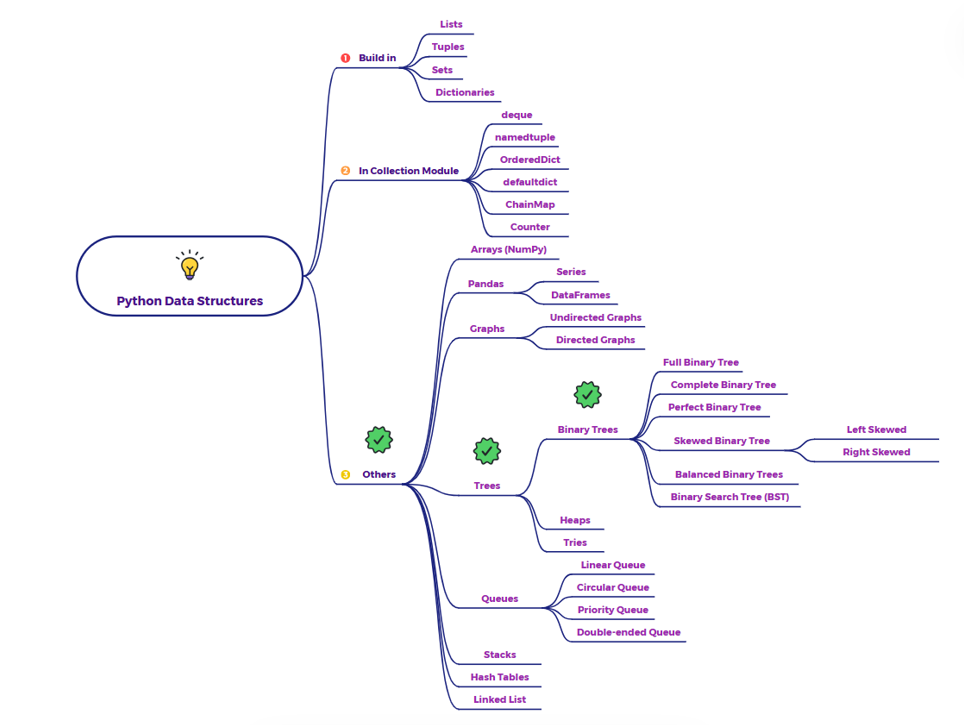


# 1. Define a Utility class and organization structure

In [157]:
# First, we define what a single person (node) in our chart looks like

class EmployeeNode:
    def __init__(self, name):
        self.name = name          # The employee's name (the value of the node)
        self.left_report = None   # Reference to their first direct report (left child)
        self.right_report = None  # Reference to their second direct report (right child)

    def __str__(self):
        return self.name

# Now, let's create our simplified organization chart
print("--- Building the Company Organization Chart ---")

# Level 0: The CEO (Root of the tree)
ceo = EmployeeNode("Alice (CEO)")

# Level 1: Direct reports to the CEO
ceo.left_report = EmployeeNode("Bob (VP Sales)")
ceo.right_report = EmployeeNode("Carol (VP Marketing)")

# Level 2: Bob's direct reports
ceo.left_report.left_report = EmployeeNode("David (Sales Manager)")
ceo.left_report.right_report = EmployeeNode("Eve (Sales Analyst)")

# Level 2: Carol's direct reports
ceo.right_report.left_report = EmployeeNode("Frank (Marketing Manager)")
# Carol only has one direct report in this example (no right_report)

print("Simplified Organization Chart Created:")
print("                 Alice (CEO)")
print("                 /         \\")
print("        Bob (VP Sales)    Carol (VP Marketing)")
print("           /    \\         /      ")
print("   David (Sales Mgr)  Eve (Sales Analyst) Frank (Mktg Mgr)\n")

--- Building the Company Organization Chart ---
Simplified Organization Chart Created:
                 Alice (CEO)
                 /         \
        Bob (VP Sales)    Carol (VP Marketing)
           /    \         /      
   David (Sales Mgr)  Eve (Sales Analyst) Frank (Mktg Mgr)



# 2. Traversal of the Binary Tree

* In-order Traversal:

Visits nodes in the order: Left Child -> Current Node -> Right Child. For a Binary Search Tree, this traversal yields elements in sorted (ascending) order.

* Pre-order Traversal:

Visits nodes in the order: Current Node -> Left Child -> Right Child. This traversal is useful for creating a copy of the tree or representing its hierarchical structure (like an outline).

* Post-order Traversal:

Visits nodes in the order: Left Child -> Right Child -> Current Node. This traversal is typically used for deleting a tree from its leaves upwards, or for evaluating expressions where operands must be processed before the operator.

* Level-order Traversal (Breadth-First Search - BFS):

Visits nodes level by level, starting from the root and moving across all nodes at the current depth before moving to the next depth. It uses a queue to manage the order of nodes to visit.

In [158]:
### Navigating the Chart (Traversal)

"""
To see who reports to whom, we can "traverse" the tree. Here are common ways to visit every employee:

"""

import collections # Used for the deque in level-order traversal

# Function to list employees in different orders
def print_employees(start_node):
    print(f"--- Employee List (Starting from {start_node.name}) ---")

    # In-order Traversal: Left -> Current -> Right
    # (Useful for getting sorted lists if it were a Binary Search Tree,
    # but here just shows a specific order of visiting)
    def in_order(node):
        if node:
            in_order(node.left_report)
            print(f"  In-order: {node.name}")
            in_order(node.right_report)

    # Pre-order Traversal: Current -> Left -> Right
    # (Useful for showing the hierarchy as you go down, like an outline)
    def pre_order(node):
        if node:
            print(f"  Pre-order: {node.name}")
            pre_order(node.left_report)
            pre_order(node.right_report)

    # Post-order Traversal: Left -> Right -> Current
    # (Useful for processing things from the bottom up, like summing up team sales)
    def post_order(node):
        if node:
            post_order(node.left_report)
            post_order(node.right_report)
            print(f"  Post-order: {node.name}")

    # Level-order Traversal: Level by Level (Breadth-First Search)
    # (Useful for seeing employees at the same organizational level)
    def level_order(node):
        if not node:
            return
        queue = collections.deque([node])
        while queue:
            current = queue.popleft()
            print(f"  Level-order: {current.name}")
            if current.left_report:
                queue.append(current.left_report)
            if current.right_report:
                queue.append(current.right_report)

    print("\n--- In-order Traversal ---")
    in_order(start_node)

    print("\n--- Pre-order Traversal ---")
    pre_order(start_node)

    print("\n--- Post-order Traversal ---")
    post_order(start_node)

    print("\n--- Level-order Traversal ---")
    level_order(start_node)

# Let's print our employees using different traversal methods
print_employees(ceo)

--- Employee List (Starting from Alice (CEO)) ---

--- In-order Traversal ---
  In-order: David (Sales Manager)
  In-order: Bob (VP Sales)
  In-order: Eve (Sales Analyst)
  In-order: Alice (CEO)
  In-order: Frank (Marketing Manager)
  In-order: Carol (VP Marketing)

--- Pre-order Traversal ---
  Pre-order: Alice (CEO)
  Pre-order: Bob (VP Sales)
  Pre-order: David (Sales Manager)
  Pre-order: Eve (Sales Analyst)
  Pre-order: Carol (VP Marketing)
  Pre-order: Frank (Marketing Manager)

--- Post-order Traversal ---
  Post-order: David (Sales Manager)
  Post-order: Eve (Sales Analyst)
  Post-order: Bob (VP Sales)
  Post-order: Frank (Marketing Manager)
  Post-order: Carol (VP Marketing)
  Post-order: Alice (CEO)

--- Level-order Traversal ---
  Level-order: Alice (CEO)
  Level-order: Bob (VP Sales)
  Level-order: Carol (VP Marketing)
  Level-order: David (Sales Manager)
  Level-order: Eve (Sales Analyst)
  Level-order: Frank (Marketing Manager)


# Key Takeaways

* **Nodes :** Each `EmployeeNode` (`Alice`, `Bob`, `David`, etc.) is a **node** in our tree.
* **Root :** `Alice (CEO)` is the **root** node, the top of the hierarchy.
* **Edges :** The connections between employees (like `ceo.left_report = Bob`) are the **edges**. These are **directed** (from manager to report).
* **Children :** `Bob` is the **left child** of `Alice`, and `Carol` is the **right child**.
* **Leaf Nodes :** `David`, `Eve`, and `Frank` are **leaf nodes** because they have no direct reports (no children)



# COMPLETED